In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import time

In [2]:
starttime=time.time()
df=pd.read_csv('SpotifyFullSampleSet.csv')
print('df.shape', df.shape)
print('df.columns', df.columns)

df.shape (33717, 36)
df.columns Index(['playlist_name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'duration_ms',
       'num_tracks.1', 'pos', 'artist_name', 'track_uri', 'artist_uri',
       'track_name', 'album_uri', 'duration_ms.1', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms.2',
       'time_signature'],
      dtype='object')


In [3]:
pd.set_option('display.max_columns',None)
df.head()

,playlist_name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_tracks.1,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms.1,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.2,time_signature
0,Throwbacks,False,0,1493424000,52,47,1,6,11532414,52,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4
1,Throwbacks,False,0,1493424000,52,47,1,6,11532414,52,1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,audio_features,6I9VzXrHxO9rA9A5euc8Ak,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,https://api.spotify.com/v1/tracks/6I9VzXrHxO9r...,https://api.spotify.com/v1/audio-analysis/6I9V...,198800,4
2,Throwbacks,False,0,1493424000,52,47,1,6,11532414,52,2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,audio_features,0WqIKmW4BTrj3eJFmnCKMv,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,https://api.spotify.com/v1/tracks/0WqIKmW4BTrj...,https://api.spotify.com/v1/audio-analysis/0WqI...,235933,4
3,Throwbacks,False,0,1493424000,52,47,1,6,11532414,52,3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0.891,0.714,4,-6.055,0,0.1400,0.20200,0.000234,0.0521,0.818,100.972,audio_features,1AWQoqb9bSvzTjaLralEkT,spotify:track:1AWQoqb9bSvzTjaLralEkT,https://api.spotify.com/v1/tracks/1AWQoqb9bSvz...,https://api.spotify.com/v1/audio-analysis/1AWQ...,267267,4
4,Throwbacks,False,0,1493424000,52,47,1,6,11532414,52,4,Shaggy,1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,audio_features,1lzr43nnXAijIGYnCT8M8H,spotify:track:1lzr43nnXAijIGYnCT8M8H,https://api.spotify.com/v1/tracks/1lzr43nnXAij...,https://api.spotify.com/v1/audio-analysis/1lzr...,227600,4


df['pid'].nunique()

In [4]:
minNumofSongsPerPlaylists=200
df_minTracks=df[df['num_tracks']>minNumofSongsPerPlaylists]

In [5]:
df_main=df_minTracks[['pid','pos','track_uri']]
df_main.head()

,pid,pos,track_uri
2291,41,0,64GRDrL1efgXclrhVCeuA0
2292,41,1,69bp2EbF7Q2rqc5N3ylezZ
2293,41,2,4VrWlk8IQxevMvERoX08iC
2294,41,3,3M5eeHXgG4VplKNcsBC8Dj
2295,41,4,494OU6M7NOf4ICYb4zWCf5


df_main.groupby('track_uri').count()['pid'].plot.bar()

In [6]:
playlist=df_main.groupby(['pid','track_uri'])['pos'].first().unstack()#(fill_value=0.0)

In [7]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 41 to 491
Columns: 3266 entries, 00rrluZUPNbfTSWvodUZbV to 7znZvX0Mt6NBmaI8VCPurT
dtypes: float64(3266)
memory usage: 408.4 KB


In [8]:
playlist.shape

(16, 3266)

In [9]:
playlist.head()

track_uri  00rrluZUPNbfTSWvodUZbV  00zqTWtvCWvDtAqoLRl6Sy  \
pid                                                         
41                          127.0                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                           NaN                     NaN   
134                           NaN                     NaN   

track_uri  01A7PEPSnmtixFPfB2UTal  01BCcxcNobPWN2sijlxBrA  \
pid                                                         
41                            NaN                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                           NaN                     NaN   
134                           NaN                     NaN   

track_uri  01JPQ87UHeGysPVwTqMJHK  01SfTM5nfCou5gQL70r6gs  \
pid                                                         
41                            NaN                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                           NaN                     1.0   
134                           NaN                     NaN   

track_uri  01u6AEzGbGbQyYVdxajxqk  01v7kv0RTVaX4Vs8GcOGOP  \
pid                                                         
41                            NaN                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                           NaN                     NaN   
134                           NaN                     NaN   

track_uri  01vgFcfgUXeFJwErbindxn  020gYw7juUaNs2tLYMlfms  \
pid                                                         
41                            NaN                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                           NaN                     NaN   
134                           NaN                     NaN   

track_uri  02Cnl9Atf8Dd8eRmgL5DFI  02FjtTsZwY2Gmk5TMpPI36  \
pid                                                         
41                            NaN                     NaN   
97                          187.0                     NaN   
123                           NaN                     NaN   
130                           NaN                     NaN   
134                           NaN                     NaN   

track_uri  02GwPAncasVL82yC7y2hmN  02JRozQlGwY7WF1xlw15G0  \
pid                                                         
41                            NaN                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                           NaN                     NaN   
134                          31.0                     NaN   

track_uri  02LAK7qT1wya0klSeNO96f  02XnQdf7sipaKBBHixz3Zp  \
pid                                                         
41                            NaN                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                         174.0                     NaN   
134                           NaN                     NaN   

track_uri  02b5L9jExmkRTdUTqXFzmR  02iZJRlOZ7VRbzO8uVdOva  \
pid                                                         
41                            NaN                     NaN   
97                            NaN                     NaN   
123                           NaN                     NaN   
130                         193.0                     NaN   
134                           NaN                     NaN   

track_uri  02lTDOxHeXTHsdwXoz6lpC  02mQcDoU5cn15U6tqZmL4e  \
pid                                                         
41                        

stack_playlist=pd.DataFrame(playlist.stack(), columns=['pos']).reset_index()

stack_playlist.head()

In [10]:
#to get the top 10 best rank song for a playlist.
playlist.iloc[0,:][playlist.iloc[0,:]>0].sort_values(ascending=True).head(10)

track_uri
69bp2EbF7Q2rqc5N3ylezZ     1.0
4VrWlk8IQxevMvERoX08iC     2.0
3M5eeHXgG4VplKNcsBC8Dj     3.0
494OU6M7NOf4ICYb4zWCf5     4.0
4biuE0gvdD3GpAryIdgVx8     5.0
0fioLzGM8ngbD1w6fMmm45     6.0
5Db9VIdDsN5yu3Eu7CT0i4     7.0
0qRR9d89hIS0MHRkQ0ejxX     8.0
235LXPXfi0SmOaS9TaCh3c     9.0
1AhDOtG9vPSOmsWgNW0BEY    10.0
Name: 41, dtype: float64

In [11]:
#to get songs at the end of playlist.
playlist.iloc[0,:][playlist.iloc[0,:]>0].sort_values(ascending=False).head(10)

track_uri
6Wo5YxkdXgwzKQZbDg2r17    208.0
6RgSSndg8PUH2UcaCgia5V    205.0
2xNalvwQ983tL8YYSkKOP1    204.0
69XcvSymPaTke2Qb6f3W6P    203.0
0QTCTu0CXv4X1JEE4gNpGv    202.0
7H6ev70Weq6DdpZyyTmUXk    201.0
0c4ICGb0jvszKj3KPR59JU    200.0
23TxRN09aR1RB0G0tFoT0b    199.0
2SawYQpvsLAEF5lpXWhvyl    198.0
5LAzjMccnLWLf8NPsXomMm    197.0
Name: 41, dtype: float64

In [12]:
playlist.iloc[0,:][playlist.iloc[0,:]>0].count()

206

In [13]:
#tracks in playlist whcih have lower position numbers are more preferred tracks. 
#track with higher position numbers less preferred tracks. 
#but different playlists have different number of tracks.
#to create a common comparision measure,transform the track position numbers to between (10,0).
#A song with with position at the beginning in playlist will have a transformed value closer to 10.
#A song with with position in playlist at the later part of playlist will have transformed value closer to 0.
#An unranked song will be given a value of zero. 

from sklearn.preprocessing import minmax_scale

for i in range(len(playlist)):
   
    playlist.iloc[i,:]=minmax_scale(playlist.iloc[i,:], feature_range=(0,10))
    playlist.iloc[i,:]=playlist.iloc[i,:].apply(lambda x: 10-x)

In [14]:
#to confirm it tracks on earlier part of playlist is transformed to lower score. 
playlist.iloc[0,:][playlist.iloc[0,:]>0].sort_values(ascending=True).head(10)

track_uri
6RgSSndg8PUH2UcaCgia5V    0.144231
2xNalvwQ983tL8YYSkKOP1    0.192308
69XcvSymPaTke2Qb6f3W6P    0.240385
0QTCTu0CXv4X1JEE4gNpGv    0.288462
7H6ev70Weq6DdpZyyTmUXk    0.336538
0c4ICGb0jvszKj3KPR59JU    0.384615
23TxRN09aR1RB0G0tFoT0b    0.432692
2SawYQpvsLAEF5lpXWhvyl    0.480769
5LAzjMccnLWLf8NPsXomMm    0.528846
2scXasE5PQEMreCBQNfUSv    0.576923
Name: 41, dtype: float64

In [15]:
# to confirm the track position further down the playlist (that is the last few songs on playlist) is tranform to 1.
playlist.iloc[0,:][playlist.iloc[0,:]>0].sort_values(ascending=False).head(10)

track_uri
64GRDrL1efgXclrhVCeuA0    10.000000
69bp2EbF7Q2rqc5N3ylezZ     9.951923
4VrWlk8IQxevMvERoX08iC     9.903846
3M5eeHXgG4VplKNcsBC8Dj     9.855769
494OU6M7NOf4ICYb4zWCf5     9.807692
4biuE0gvdD3GpAryIdgVx8     9.759615
0fioLzGM8ngbD1w6fMmm45     9.711538
5Db9VIdDsN5yu3Eu7CT0i4     9.663462
0qRR9d89hIS0MHRkQ0ejxX     9.615385
235LXPXfi0SmOaS9TaCh3c     9.567308
Name: 41, dtype: float64

The smaller value of the transformed position number, implies that track was added later to the playlist.
At value of of 1, for the transformed position number, implies that track was last on playlist.  

In [16]:
#stacking back playlist - possibly to use as dataset for KNN and decision Tree
stack_playlist=pd.DataFrame(playlist.stack(), columns=['pos']).reset_index()
stack_playlist.head()

,pid,track_uri,pos
0,41,00rrluZUPNbfTSWvodUZbV,3.894231
1,41,081t95JRuDUrQYSS3h8iKk,2.307692
2,41,08zgiAP2zezRPHdrWaRDbO,1.826923
3,41,09mhA1SJjMHniZPF4Hcihn,7.259615
4,41,0B7wvvmu9EISAwZnOpjhNI,7.596154


In [17]:
playlist.fillna(value=0,inplace=True)

In [18]:
playlist.head()

track_uri  00rrluZUPNbfTSWvodUZbV  00zqTWtvCWvDtAqoLRl6Sy  \
pid                                                         
41                       3.894231                     0.0   
97                       0.000000                     0.0   
123                      0.000000                     0.0   
130                      0.000000                     0.0   
134                      0.000000                     0.0   

track_uri  01A7PEPSnmtixFPfB2UTal  01BCcxcNobPWN2sijlxBrA  \
pid                                                         
41                            0.0                     0.0   
97                            0.0                     0.0   
123                           0.0                     0.0   
130                           0.0                     0.0   
134                           0.0                     0.0   

track_uri  01JPQ87UHeGysPVwTqMJHK  01SfTM5nfCou5gQL70r6gs  \
pid                                                         
41                            0.0                 0.00000   
97                            0.0                 0.00000   
123                           0.0                 0.00000   
130                           0.0                 9.95098   
134                           0.0                 0.00000   

track_uri  01u6AEzGbGbQyYVdxajxqk  01v7kv0RTVaX4Vs8GcOGOP  \
pid                                                         
41                            0.0                     0.0   
97                            0.0                     0.0   
123                           0.0                     0.0   
130                           0.0                     0.0   
134                           0.0                     0.0   

track_uri  01vgFcfgUXeFJwErbindxn  020gYw7juUaNs2tLYMlfms  \
pid                                                         
41                            0.0                     0.0   
97                            0.0                     0.0   
123                           0.0                     0.0   
130                           0.0                     0.0   
134                           0.0                     0.0   

track_uri  02Cnl9Atf8Dd8eRmgL5DFI  02FjtTsZwY2Gmk5TMpPI36  \
pid                                                         
41                       0.000000                     0.0   
97                       1.939655                     0.0   
123                      0.000000                     0.0   
130                      0.000000                     0.0   
134                      0.000000                     0.0   

track_uri  02GwPAncasVL82yC7y2hmN  02JRozQlGwY7WF1xlw15G0  \
pid                                                         
41                       0.000000                     0.0   
97                       0.000000                     0.0   
123                      0.000000                     0.0   
130                      0.000000                     0.0   
134                      8.663793                     0.0   

track_uri  02LAK7qT1wya0klSeNO96f  02XnQdf7sipaKBBHixz3Zp  \
pid                                                         
41                       0.000000                     0.0   
97                       0.000000                     0.0   
123                      0.000000                     0.0   
130                      1.470588                     0.0   
134                      0.000000                     0.0   

track_uri  02b5L9jExmkRTdUTqXFzmR  02iZJRlOZ7VRbzO8uVdOva  \
pid                                                         
41                       0.000000                     0.0   
97                       0.000000                     0.0   
123                      0.000000                     0.0   
130                      0.539216                     0.0   
134                      0.000000                     0.0   

track_uri  02lTDOxHeXTHsdwXoz6lpC  02mQcDoU5cn15U6tqZmL4e  \
pid                                                         
41                        

In [19]:
playlist.iloc[0,:][playlist.iloc[0,:]>0]

track_uri
00rrluZUPNbfTSWvodUZbV    3.894231
081t95JRuDUrQYSS3h8iKk    2.307692
08zgiAP2zezRPHdrWaRDbO    1.826923
09mhA1SJjMHniZPF4Hcihn    7.259615
0B7wvvmu9EISAwZnOpjhNI    7.596154
                            ...   
7oGZAicScQt96OAW4AruYy    9.086538
7qPp87sQuqhgEenEszVFSp    4.134615
7rmrdLeLBJQYjtNe8c3YJg    4.711538
7z3N2W7Xz1t2G2sAO8wFVH    8.173077
7zOtXBS23pOhmef9hv6CKk    4.471154
Name: 41, Length: 206, dtype: float64

In [20]:
def recommend_playlist(playlist,query_playlist,k,N):
    
    U, sigma_diag_matrix, Vt=cal_svd(playlist,k)
    #preds_df=predict_playlist_ratings(U, sigma_diag_matrix, Vt)
    query_playlist=query_playlist.to_numpy()
    
    #print(query_playlist.shape,(query_playlist.T).shape, Vt.shape)
    
    predict_playlist=newplaylist_vector(query_playlist,Vt, sigma_diag_matrix)
    #print(predict_playlist)
    #print('len predict_playlist:',len(predict_playlist)) #predict_playlist comprises of 505 playlists
    
    bestSortedPredictedPlaylist_tuple=create_sortedList(predict_playlist,N)
    #print('Top N Sorted Predicted Playlist :\n',bestSortedPredictedPlaylist_tuple)
    
    bestSortedQueryPlaylist_tuple=create_sortedList(query_playlist,N)
    #print('Top N Sorted Query Playlist :\n',bestSortedQueryPlaylist_tuple)
    #selectedtracks=create_set(bestSortedQueryPlaylist_tuple,bestSortedPredictedPlaylist_tuple)
    #print(selectedtracks)
    #recommendedTracks(selectedtracks, predict_playlist)
    #print(bestSortedQueryPlaylist_tuple[1][0])
    recall_score=cal_recall_score(bestSortedQueryPlaylist_tuple,bestSortedPredictedPlaylist_tuple)
    return recall_score


In [21]:
def create_sortedList(lst,N): #pass in predict_playlist
    ranklist=[]
    for i,score in enumerate(lst): #i is column index number, score is the transformed rank position in playlist.
        ranklist.append((i,score))

    sorted_ranklist=sorted(ranklist, key=lambda x:x[1]) #sort based on transformed rank position for each tuple.
    #print(sorted_ranklist)
    sorted_ranklist=[i for i in sorted_ranklist if i[1]>0] #remove all zero value tranformed rank position.
    #print("sorted_ranklist :\n",sorted_ranklist)
    #print(sorted_ranklist[0:N])
    return sorted_ranklist[0:N] 
                #return only top 30 selected tracks based on transformed rank position predicted by SVD.
                #if its query_playlist, just return the top30 tracks in the playlist.
    

In [22]:
def create_set(bestSortedQueryPlaylist_tuple, bestSortedPredictedPlaylist_tuple):
    #print(bestSortedQueryPlaylist_tuple[0])
    selectedtracks=set(bestSortedQueryPlaylist_tuple[0])-set(bestSortedPredictedPlaylist_tuple[0])
    return selectedtracks

In [23]:
#use newplaylist_vector to work out predicted playlist from query playlist.
from numpy.linalg import inv
def newplaylist_vector(newplaylistRatingVector,Vt, sigma_diag_matrix):
    
    return np.dot(np.dot(newplaylistRatingVector,Vt.T),inv(sigma_diag_matrix))
    

In [ ]:
#Number of Feature Components For SVD >10
#Otherwise no recall value can be found for all playlists.

from sklearn.utils.extmath import randomized_svd

def cal_svd(playlist,k):

    U, Sigma, Vt = randomized_svd(playlist.to_numpy(), 
                              n_components=100,
                              n_iter=5,
                              random_state=42)
    sigma_diag_matrix = np.diag(Sigma)
    return U, sigma_diag_matrix, Vt


In [24]:
#from numpy import linalg

'''
from scipy.sparse.linalg import svds

def cal_svd(playlist,k):

    U, sigma, Vt = svds(playlist, k=k-1)
    #U, sigma, Vt = linalg.svd(playlist)
    sigma_diag_matrix = np.diag(sigma)
    return U, sigma_diag_matrix, Vt

'''

def predict_playlist_ratings(U, sigma_diag_matrix, Vt):
    playlist_predicted_ratings = np.dot(np.dot(U, sigma_diag_matrix), Vt)
    preds_df = pd.DataFrame(playlist_predicted_ratings, columns = playlist.columns, index=playlist.index)
    
    return preds_df


In [25]:
def cal_recall_score(bestSortedQueryPlaylist_tuple,bestSortedPredictedPlaylist_tuple):
    
    q_pl=[bestSortedQueryPlaylist_tuple[i][0] for i in range(len(bestSortedQueryPlaylist_tuple))]
    p_pl=[bestSortedPredictedPlaylist_tuple[i][0] for i in range(len(bestSortedPredictedPlaylist_tuple))]
    
    correctlyRecommendedSongs=set(q_pl).intersection(set(p_pl))
    #if len(correctlyRecommendedSongs)!=0:
        #print(correctlyRecommendedSongs)
    recallscore=len(correctlyRecommendedSongs)/len(bestSortedQueryPlaylist_tuple)
    return recallscore

In [26]:
from statistics import mean
resultlist=[]
def start_SVD(playlist, k,numTopRankedSongs,minNumofSongsPerPlaylists):
    compiledResult=[]
    nonZeroRecallCount=0
    for i in range(len(playlist)):
        recall_value=recommend_playlist(playlist,playlist.iloc[i,:],k,numTopRankedSongs) #get recall score for top30 songs from query playlist & predicted plaulist
        if recall_value !=0:
            nonZeroRecallCount+=1
        else:
            continue
        print("Recall value based on top {0} songs for playlist pid {1} is {2} ".format(numTopRankedSongs,playlist.index[i],recall_value))
        resultlist.append(recall_value)
    
    playlistlistRecallRate=nonZeroRecallCount/len(playlist)
    print("Proportion Of Songs In Query Playlist That Is Predicted By Recommended Playllist : {}".format(playlistlistRecallRate) )
    compiledResult.append((k,numTopRankedSongs,minNumofSongsPerPlaylists,mean(resultlist),playlistlistRecallRate))
    print("Average Recall for {0} playlist with minimum {1} is {2}".format(len(playlist), minNumofSongsPerPlaylists,mean(resultlist)))
    #everytime a non zero recall_value is returned, it implies there is a match 
    #in the predicted playlist's songs with query playlist. 
    #this implies that a song can be found both list within the search criteria. 
    return compiledResult

In [27]:
numTopRankedSongs=50 #len(playlist.columns)
#minNumofSongsPerPlaylists=50
k=len(playlist.index) #number of playlists in the selected dataset

In [28]:
result=start_SVD(playlist, k,numTopRankedSongs,minNumofSongsPerPlaylists)

print('Time Taken :',time.time()-starttime)

Recall value based on top 50 songs for playlist pid 130 is 0.02 
Recall value based on top 50 songs for playlist pid 341 is 0.02 
Proportion Of Songs In Query Playlist That Is Predicted By Recommended Playllist : 0.125
Average Recall for 16 playlist with minimum 200 is 0.02
Time Taken : 3.5946710109710693


In [29]:
print(result)

[(16, 50, 200, 0.02, 0.125)]


## Result 1:
#### Based on Top 50 predicted ranked songs.
#### Number of Feature Components For SVD = max. columns

Each Result Is Described According:

(Number Of Playlist, Top 50 Predicted Ranked Songs, Min Songs In Playlist, Average Recall, Proportion Playlists With Non Zero Recall )

* [(16, 50, 200, 0.02, 0.125)]

    * Time Taken : 3.765651226043701

* [(53, 50, 150, 0.02, 0.07547169811320754)]

    * Time Taken : 8.922374963760376

* [(114, 50, 100, 0.022, 0.17543859649122806)]

    * Time Taken : 18.178131818771362

* [(250, 50, 50, 0.021052631578947368, 0.076)]

    * Time Taken : 313.76706314086914

* [(506, 50, 0, 0.024006753825906, 0.06719367588932806)]

    * Time Taken : 2761.4895629882812



## Result 2:
#### Based on Top 100 predicted ranked songs.
#### Number of Feature Components For SVD = max. columns

Each Result Is Described According:

(Number Of Playlist, Top 100 Predicted Ranked Songs, Min Songs In Playlist, Average Recall, Proportion Playlists With Non Zero Recall )


* [(16, 100, 200, 0.01, 0.4375)]
    * Time Taken : 3.652780055999756

* (53, 100, 150, 0.012, 0.2830188679245283)]
    * Time Taken : 9.069653034210205

* [(114, 100, 100, 0.011282051282051283, 0.34210526315789475)]
    * Time Taken : 24.539703130722046

* [(250, 100, 50, 0.013941554686790649, 0.352)]
    * Time Taken : 313.76706314086914

* [(506, 100, 0, 0.021023054759045152, 0.191699604743083)]
    * Time Taken : 2651.691525220871

## Result 3:
#### Based on Top 50 predicted ranked songs.

#### Number of Feature Components For SVD = 15

Each Result Is Described According:

(Number Of Playlist, Top 50 Predicted Ranked Songs, Min Songs In Playlist, Average Recall, Proportion Playlists With Non Zero Recall ) 


* [(16, 50, 200, 0.02, 0.0625)]
    * Time Taken : 3.640241861343384

* [(53, 50, 150, 0.02, 0.07547169811320754)]
    * Time Taken : 9.461413860321045

* [(114, 50, 100, 0.02, 0.02631578947368421)]
    * Time Taken : 17.538280963897705

* [(250, 50, 50, 0.02, 0.012)]
    * Time Taken : 37.31797194480896

* [(506, 50, 0, 0.029511599511599512, 0.011857707509881422)]
    * Time Taken : 91.1149959564209


## Result 4:
#### Based on Top 100 predicted ranked songs.

#### Number of Feature Components For SVD = 15

Each Result Is Described According:

(Number Of Playlist, Top 100 Predicted Ranked Songs, Min Songs In Playlist, Average Recall, Proportion Playlists With Non Zero Recall )


* [(16, 100, 200, 0.01, 0.1875)]
    * Time Taken : 3.6547820568084717

* [(53, 100, 150, 0.01, 0.16981132075471697)]
    * Time Taken : 9.138758182525635

* [(114, 100, 100, 0.011428571428571429, 0.06140350877192982)]
    * Time Taken : 17.27802300453186

* [(250, 100, 50, 0.013625331015792337, 0.024)]
    * Time Taken : 37.6826229095459

* [(506, 100, 0, 0.02028215932190499, 0.017786561264822136)]
    * Time Taken : 106.31283593177795



## Result 5:
#### Based on Top 50 predicted ranked songs.

#### Number of Feature Components For SVD = 100

Each Result Is Described According:

(Number Of Playlist, Top 100 Predicted Ranked Songs, Min Songs In Playlist, Average Recall, Proportion Playlists With Non Zero Recall )


* [(16, 50, 200, 0.02, 0.0625)]
    * Time Taken : 3.6940841674804688

* [(53, 50, 150, 0.02, 0.03773584905660377)]
    * Time Taken : 10.217845916748047

* [(114, 50, 100, 0.02, 0.18421052631578946)]
    * Time Taken : 28.73056197166443

* [(250, 50, 50, 0.021111111111111112, 0.144)]
    * Time Taken : 83.42900705337524

* [(506, 50, 0, 0.026498141189360787, 0.06521739130434782)]
    * Time Taken : 279.43982911109924



## Result 6:
#### Based on Top 100 predicted ranked songs.

#### Number of Feature Components For SVD = 100

Each Result Is Described According:

(Number Of Playlist, Top 100 Predicted Ranked Songs, Min Songs In Playlist, Average Recall, Proportion Playlists With Non Zero Recall )


* [(16, 100, 200, 0.01, 0.1875)]
    * Time Taken : 3.6447837352752686

* [(53, 100, 150, 0.010769230769230769, 0.24528301886792453)]
    * Time Taken : 10.097471952438354

* (114, 100, 100, 0.010558361391694726, 0.3157894736842105)]
    * Time Taken : 28.687176942825317

* [(250, 100, 50, 0.013943706163395759, 0.22)]
    * Time Taken : 81.82194876670837

* [(506, 100, 0, 0.02008187970832471, 0.09288537549407115)]
    * Time Taken : 272.9590699672699



In [193]:
numPlaylist=[16,53,114,250,506]
numUniqueSongsFromAllPlaylists=[50,100] #choose from the number of predicted songs to rank and calculate recall 
minNumberSongsInPlaylist=[201,151,101,51,1]


recall_score_50=[0.02,0.02,0.022,0.021052631578947368,0.024006753825906]
recall_score_100=[0.01, 0.012,0.011282051282051283,0.013941554686790649,0.021023054759045152]


timeTaken_100=[3.652780055999756, 9.069653034210205,24.539703130722046,313.76706314086914,2651.691525220871]
timeTaken_50=[3.652780055999756, 9.069653034210205,24.539703130722046,313.76706314086914,2651.691525220871]

proportionNonZero_50=[0.125,0.07547169811320754,0.17543859649122806,0.076,0.06719367588932806]
proportionNonZero_100=[0.4375,0.2830188679245283,0.34210526315789475,0.352,0.191699604743083]

recall_score_50_SVD_15=[0.02,0.02,0.02,0.02,0.029511599511599512 ]
recall_score_100_SVD_15=[0.01,0.01, 0.011428571428571429,0.013625331015792337,0.02028215932190499]

timeTaken_50_SVD_15=[3.640241861343384,9.461413860321045,17.538280963897705,37.6826229095459,106.31283593177795 ]
timeTaken_100_SVD_15=[3.6547820568084717,9.138758182525635,17.27802300453186,37.6826229095459,106.31283593177795 ]

proportionNonZero_50_SVD15=[0.1875,0.16981132075471697,0.06140350877192982,0.024,0.017786561264822136]
proportionNonZero_100_SVD15=[0.0625,0.03773584905660377,0.18421052631578946,0.144,0.06521739130434782]

In [552]:
import matplotlib.pyplot as plt

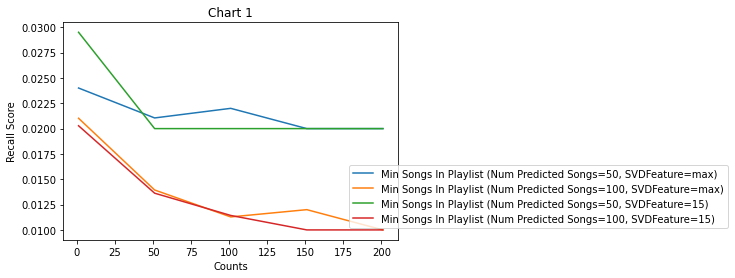

In [196]:
plt.plot(minNumberSongsInPlaylist ,recall_score_50, label='Min Songs In Playlist (Num Predicted Songs=50, SVDFeature=max)')
plt.plot(minNumberSongsInPlaylist ,recall_score_100, label='Min Songs In Playlist (Num Predicted Songs=100, SVDFeature=max)')


plt.plot(minNumberSongsInPlaylist ,recall_score_50_SVD_15, label='Min Songs In Playlist (Num Predicted Songs=50, SVDFeature=15)')

plt.plot(minNumberSongsInPlaylist ,recall_score_100_SVD_15, label='Min Songs In Playlist (Num Predicted Songs=100, SVDFeature=15)')


#plt.plot(numPlaylist,recall_score_50, label='Number Of Playlist(Num Predicted Songs =50) ')
plt.ylabel('Recall Score')
plt.xlabel('Counts')
plt.title('Chart 1')
plt.legend(loc='center right', bbox_to_anchor=(2.0,0.2))
plt.show()

#This chart clearly shows using SVD with features components =15 does not reduce the recall score much.
#But when number of songs in playlist is large, the low featue component leads to higher recall score.
#This is may be due to removal of highly correlated features. In this case songs with correlated audio features. 

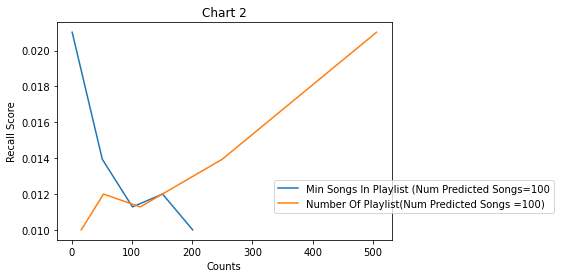

In [185]:
plt.plot(minNumberSongsInPlaylist ,recall_score_100, label='Min Songs In Playlist (Num Predicted Songs=100')
plt.plot(numPlaylist,recall_score_100, label='Number Of Playlist(Num Predicted Songs =100) ')

plt.title('Chart 2')
plt.ylabel('Recall Score')
plt.xlabel('Counts')
plt.legend(loc='center right', bbox_to_anchor=(1.5,0.2))
plt.show()

#this shows tht having more songs in each playlist generally lead to better recall score.
#but the the flip side is that number of playlist available to train the model is reduced. 

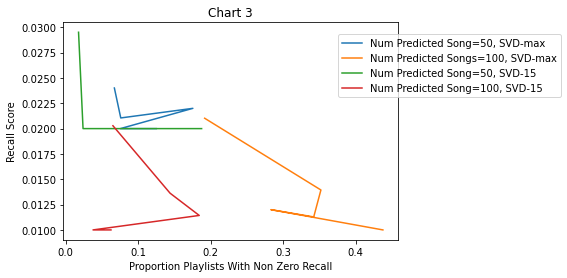

In [204]:
plt.plot(proportionNonZero_50 ,recall_score_50, label='Num Predicted Song=50, SVD-max')
plt.plot(proportionNonZero_100 ,recall_score_100, label='Num Predicted Songs=100, SVD-max')

plt.plot(proportionNonZero_50_SVD15 ,recall_score_50_SVD_15, label='Num Predicted Song=50, SVD-15')
plt.plot(proportionNonZero_100_SVD15 ,recall_score_100_SVD_15, label='Num Predicted Song=100, SVD-15')


plt.ylabel('Recall Score')
plt.xlabel('Proportion Playlists With Non Zero Recall')
plt.title('Chart 3')
plt.legend(loc='center right', bbox_to_anchor=(1.5,0.8))
plt.show()

#it appears that the proportion of playlists with non zero recall seems to increase when average recall score is lower.
#For same number of predicted songs, a decrease in SVD feature component leads to a decline in 
#in proportion of playlists with non zero recal, but not much loss in recall score.
#This is result of having more playlists that did not predict any song that appears in 'query playlist'.
#It can be said that the songs have a more spread out latent features. 
#So its likely that we don't have a bunch of very strong latent featues and the rest are weak. 
#More likely a gentle spread. 



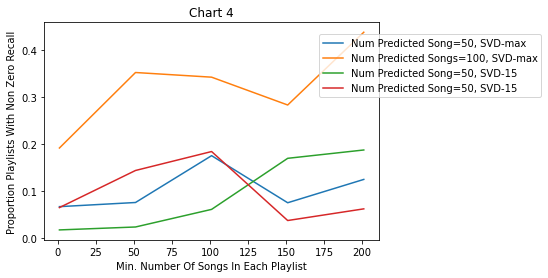

In [203]:
plt.plot(minNumberSongsInPlaylist ,proportionNonZero_50, label='Num Predicted Song=50, SVD-max')
plt.plot(minNumberSongsInPlaylist ,proportionNonZero_100, label='Num Predicted Songs=100, SVD-max')

plt.plot(minNumberSongsInPlaylist ,proportionNonZero_50_SVD15, label='Num Predicted Song=50, SVD-15')
plt.plot(minNumberSongsInPlaylist ,proportionNonZero_100_SVD15, label='Num Predicted Song=50, SVD-15')


plt.ylabel('Proportion Playlists With Non Zero Recall')
plt.xlabel('Min. Number Of Songs In Each Playlist')
plt.title('Chart 4')
plt.legend(loc='center right', bbox_to_anchor=(1.5,0.8))
plt.show()

#When the number of predicted songs is lower, it generally has lower proportion of playlists with non zero recall.
#it seems like a plausible that with more songs in each playlist, there is more opportunities to find song that will
#match a particular "query playlist"



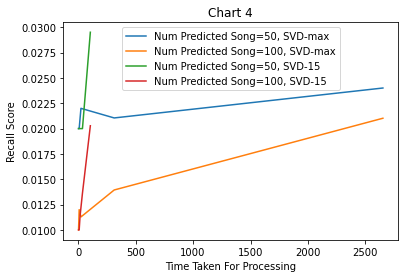

In [200]:
plt.plot(timeTaken_50 ,recall_score_50, label='Num Predicted Song=50, SVD-max')
plt.plot(timeTaken_100 ,recall_score_100, label='Num Predicted Song=100, SVD-max')

plt.plot(timeTaken_50_SVD_15 ,recall_score_50_SVD_15, label='Num Predicted Song=50, SVD-15')
plt.plot(timeTaken_100_SVD_15 ,recall_score_100_SVD_15, label='Num Predicted Song=100, SVD-15')
plt.title('Chart 4')


plt.ylabel('Recall Score')
plt.xlabel('Time Taken For Processing')
plt.legend()
plt.show()

#the chart shows a significant decline in processing time using SVD with smaller number of feature components.

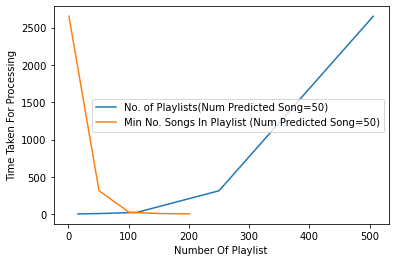

In [585]:
plt.plot(numPlaylist ,timeTaken_50, label='No. of Playlists(Num Predicted Song=50)')
#plt.plot(numPlaylist ,timeTaken_100, label='Num Predicted Song=100')


plt.plot(minNumberSongsInPlaylist ,timeTaken_50, label='Min No. Songs In Playlist (Num Predicted Song=50)')
#plt.plot(minNumberSongsInPlaylist ,timeTaken_100, label='Min No. Songs In Playlist (Num Predicted Song=100)')
plt.ylabel('Time Taken For Processing')
plt.xlabel('Number Of Playlist')
plt.legend()
plt.show()

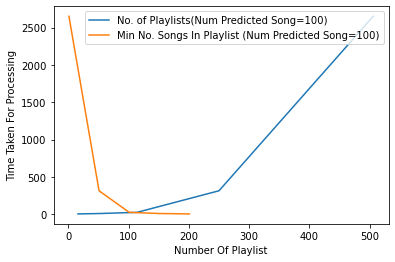

In [587]:
plt.plot(numPlaylist ,timeTaken_100, label='No. of Playlists(Num Predicted Song=100)')
plt.plot(minNumberSongsInPlaylist ,timeTaken_100, label='Min No. Songs In Playlist (Num Predicted Song=100)')
plt.ylabel('Time Taken For Processing')
plt.xlabel('Number Of Playlist')
plt.legend()
plt.show()